# Table of Contents

* [Data Sources](#Data-Sources)
* [Gather the Data](#Gather-the-Data)
* [Explore the Data](#Explore-the-Data)
    * [Merge the titleBasics and titleRatings Data](#Merge-the-titleBasics-and-titleRatings-Data)
    * [Explore titleType From titleBasics](#Explore-titleType-From-titleBasics)
    * [Explore Rows with Null Data](#Explore-Rows-with-Null-Data)
    * [Determine What Timeframe to Include](#Determine-What-Timeframe-to-Include)
    * [Determine What Genres to Include](#Determine-What-Genres-to-Include)
    * [Determine the Target Average Rating](#Determine-the-Target-Average-Rating)
* [Model the Data](#Model-the-Data)
* [Visualize the Results](#Visualize-the-Results)


<hr>

## Data Sources

Description of the IMDB data: https://www.imdb.com/interfaces/

IMDB Data Sources: https://datasets.imdbws.com/

<hr>

## Gather the Data

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
sns.set(rc={'figure.figsize': (12, 10), "lines.markeredgewidth": 0.5 })

In [4]:
# display imdb documentation in the notebook
from IPython.display import IFrame
IFrame("../IMDB Dataset Descriptions.pdf", 800, 600)

In [5]:
# display imdb ER Diagram in the notebook
from IPython.display import IFrame
IFrame("../../Presentation/IMDB ERD.pdf", 800, 600)

In [7]:
#===============================================================================
#     READ INPUT DATA
#===============================================================================

#--------------------------------------------------------
#--  Input File 1:  name.basics.tsv
#--------------------------------------------------------
print('Reading name.basics.tsv')
nameBasics = pd.read_csv("../Data/name.basics.tsv/data.tsv", sep='\t')
print('Complete - 1 of 7')
print(nameBasics.head(5))

#--------------------------------------------------------
#--  Input File 2:  title.akas.tsv
#--------------------------------------------------------
#print('Reading title.akas.tsv')
#titleAkas = pd.read_csv("./Data/title.akas.tsv/data.tsv", sep='\t',dtype={"titleId": object, "ordering": object, "title": object, "region": object, "language": object, "types": object, "attributes": object, "isOriginalTitle": object})
#print('Complete - 2 of 7')
#print(titleAkas.head(5))

#--------------------------------------------------------
#--  Input File 3:  title.basics.tsv
#--------------------------------------------------------
print('Reading title.basics.tsv')
titleBasics = pd.read_csv("../Data/title.basics.tsv/data.tsv", sep='\t',dtype={"tconst": object, "titleType": object, "primaryTitle": object, "originalTitle": object, "isAdult": object, "startYear": object})
#print('Complete - 3 of 7')
titleBasics = titleBasics[titleBasics.isAdult == "0"]
print(titleBasics.head(5))

#--------------------------------------------------------
#--  Input File 4:  title.crew.tsv
#--------------------------------------------------------
print('Reading title.crew.tsv')
titleCrew = pd.read_csv("../Data/title.crew.tsv/data.tsv", sep='\t')
print('Complete - 4 of 7')
print(titleCrew.head(5))

#--------------------------------------------------------
#--  Input File 5:  title.episode.tsv
#--------------------------------------------------------
#print('Reading title.episode.tsv')
#titleEpisode = pd.read_csv("./Data/title.episode.tsv/data.tsv", sep='\t')
#print('Complete - 5 of 7')
#print(titleEpisode.head(5))

#--------------------------------------------------------
#--  Input File 6:  title.principals.tsv
#--------------------------------------------------------
#print('Reading title.principals.tsv')
#titlePrincipals = pd.read_csv("./Data/title.principals.tsv/data.tsv", sep='\t')
#print('Complete - 6 of 7')
#print(titlePrincipals.head(5))

#--------------------------------------------------------
#--  Input File 7:  title.ratings.tsv
#--------------------------------------------------------
print('Reading title.ratings.tsv')
titleRatings = pd.read_csv("../Data/title.ratings.tsv/data.tsv", sep='\t',dtype={"tconst": object, "averageRating": float, "numVotes": int})
print('CompletitleRatingste - 7 of 7')
print(titleRatings.head(5))

print('\n-----all data loaded -----')

Reading name.basics.tsv
Complete - 1 of 7
      nconst      primaryName birthYear deathYear  \
0  nm0000001     Fred Astaire      1899      1987   
1  nm0000002    Lauren Bacall      1924      2014   
2  nm0000003  Brigitte Bardot      1934        \N   
3  nm0000004     John Belushi      1949      1982   
4  nm0000005   Ingmar Bergman      1918      2007   

                primaryProfession                           knownForTitles  
0  soundtrack,actor,miscellaneous  tt0072308,tt0050419,tt0045537,tt0043044  
1              actress,soundtrack  tt0071877,tt0038355,tt0037382,tt0117057  
2     actress,soundtrack,producer  tt0049189,tt0054452,tt0057345,tt0059956  
3         actor,writer,soundtrack  tt0077975,tt0078723,tt0080455,tt0072562  
4           writer,director,actor  tt0060827,tt0050986,tt0050976,tt0083922  
Reading title.basics.tsv
      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  t

<hr>

## Explore the Data

In [8]:
titleBasics.describe()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
count,5014034,5014034,5014028,5014028,5014034,5014034,5014034,5014034,5014034
unique,5014034,10,2599847,2613619,1,146,94,777,2082
top,tt1646262,tvEpisode,Episode #1.1,Episode #1.1,0,\N,\N,\N,\N
freq,1,3428396,28903,28909,5014034,293269,4972993,3480485,410277


In [9]:
nameBasics.describe()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
count,8755201,8755201,8755201,8755201,7220470,8755201
unique,8755201,6905502,392,373,17683,3781891
top,nm8244688,Michael Smith,\N,\N,actor,\N
freq,1,298,8341079,8607146,1668047,1038255


In [10]:
titleCrew.describe()

,tconst,directors,writers
count,5172253,5172253,5172253
unique,5172253,626218,896190
top,tt1646262,\N,\N
freq,1,2203911,2604020


In [11]:
titleRatings.describe()

,averageRating,numVotes
count,854814.000000,8.548140e+05
mean,6.931535,9.777857e+02
std,1.394671,1.537493e+04
min,1.000000,5.000000e+00
25%,6.200000,9.000000e+00
50%,7.100000,2.000000e+01
75%,7.900000,7.700000e+01
max,10.000000,1.977445e+06


In [9]:
len(titleBasics) - len(titleRatings)

4159220

The titleBasics table has 4153738 more rows than the titleRatings table. 

Will need to look at removing NaN were appropriate and get a subset of data that contains only movies.

<hr>

### Merge the titleBasics and titleRatings Data

No need to rename columns as the column names are already consistent and have a way to join naturally using the `tconst` column.

Use of the pandas database-style [`merge()`](http://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging) function.

In [12]:
# returns an inner join of both dataframes
title_data = pd.merge(titleBasics, titleRatings, how='inner', on=['tconst'])

# Check the length of the resulting join
len(title_data)

837679

In [13]:
title_data.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1393
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.5,163
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.6,982
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short",6.4,98
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short,6.2,1676


_Note that later in the notebook the null values are fixed_

In [14]:
# check if any rows are missing data
title_data.isnull().sum()

tconst            0
titleType         0
primaryTitle      0
originalTitle     0
isAdult           0
startYear         0
endYear           0
runtimeMinutes    0
genres            0
averageRating     0
numVotes          0
dtype: int64

<hr>

### Merge the nameBasics and titleCrew Data

No need to rename columns as the column names are already consistent and have a way to join naturally using the `tconst` column.

Use of the pandas database-style [`merge()`](http://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging) function.

In [21]:
# returns an inner join of both dataframes
crew_data = pd.merge(titleRatings, titleCrew, how='outer', on=['tconst'])

# Check the length of the resulting join
len(crew_data)

5172253

In [59]:
crew_data.head(200)

,tconst,averageRating,numVotes,directors,writers
0,tt0000001,5.8,1393.0,nm0005690,\N
1,tt0000002,6.5,163.0,nm0721526,\N
2,tt0000003,6.6,982.0,nm0721526,\N
3,tt0000004,6.4,98.0,nm0721526,\N
4,tt0000005,6.2,1676.0,nm0005690,\N
5,tt0000006,5.6,87.0,nm0005690,\N
6,tt0000007,5.5,563.0,"nm0005690,nm0374658",\N
7,tt0000008,5.6,1502.0,nm0005690,\N
8,tt0000009,5.5,67.0,nm0085156,nm0085156
9,tt0000010,6.9,5006.0,nm0525910,\N


In [32]:
# returns an inner join of both dataframes
#crewTitle_data = pd.merge(title_data, crew_data, how='outer', on=['tconst'],
#                         right_on='crewRating')

# Check the length of the resulting join
#len(crewTitle_data)

MergeError: Can only pass argument "on" OR "left_on" and "right_on", not a combination of both.

In [30]:
crewTitle_data.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating_x,numVotes_x,averageRating_y,numVotes_y,directors,writers
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1393.0,5.8,1393.0,nm0005690,\N
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.5,163.0,6.5,163.0,nm0721526,\N
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.6,982.0,6.6,982.0,nm0721526,\N
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short",6.4,98.0,6.4,98.0,nm0721526,\N
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short,6.2,1676.0,6.2,1676.0,nm0005690,\N


<hr>

### Explore titleType From titleBasics

In [33]:
crewTitle_data.titleType.value_counts()

tvEpisode       358510
movie           217700
short           102941
tvSeries         58242
tvMovie          42271
video            32596
videoGame         8573
tvMiniSeries      8068
tvSpecial         6365
tvShort           2413
Name: titleType, dtype: int64

TitleTypes to include:
- movie

TitleTypes to consider (similar to movies, these have one runtime with no endYear value):
- short, tvMovie, video, tvSpecial, tvShort

The below 3 cells explore the titleTypes to consider that also fit the "movie" criteria.

In [39]:
crewTitle_data_titleType = crewTitle_data[crewTitle_data.titleType == 'movie']

crewTitle_data_titleType.head(5)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating_x,numVotes_x,averageRating_y,numVotes_y,directors,writers
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,5.5,67.0,5.5,67.0,nm0085156,nm0085156
142,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,20,"Documentary,News,Sport",5.2,259.0,5.2,259.0,nm0714557,\N
235,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,0,1900,\N,\N,"Biography,Drama",6.2,35.0,6.2,35.0,"nm0095714,nm0675140",\N
337,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Biography,Crime,Drama",6.3,464.0,6.3,464.0,nm0846879,nm0846879
353,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama,5.1,13.0,5.1,13.0,nm0533958,"nm0092809,nm0533958"


In [40]:
crewTitle_data_titleType.endYear.value_counts()

\N    217700
Name: endYear, dtype: int64

In [41]:
crewTitle_data_titleType.startYear.describe()

count     217700
unique       124
top         2016
freq        8342
Name: startYear, dtype: object

Apply a mask that removes all title types that are not `movies`, then save the results to a new dataframe.

In [42]:
movie_data = crewTitle_data[crewTitle_data.titleType == 'movie']

In [45]:
# Confirm the subset has fewer records than the original dataset
len(movie_data) < len(crewTitle_data)
len(movie_data)

217700

Next remove unused columns that contain all NaN or null values.

In [46]:
# Confirm there are no values for the endYear
movie_data.endYear.value_counts()

\N    217700
Name: endYear, dtype: int64

In [57]:
# drop unused columns
movie_data = movie_data.drop(['titleType', 'isAdult', 'endYear'], axis=1)

movie_data.head()

KeyError: "labels ['titleType' 'isAdult' 'endYear'] not contained in axis"

<hr>

### Explore Rows with Null Data

Next will explore rows with null data and will need to decide if they should be included in the final dataset. As well as explore the datatypes of rows with numerical data.

In [48]:
# check if any rows are missing data
movie_data.isnull().sum()

tconst             0
primaryTitle       0
originalTitle      0
startYear          0
runtimeMinutes     0
genres             0
averageRating_x    0
numVotes_x         0
averageRating_y    0
numVotes_y         0
directors          0
writers            0
dtype: int64

In [49]:
movie_data.runtimeMinutes.unique()

array(['45', '20', '\\N', '70', '120', '60', '53', '50', '48', '100',
       '68', '43', '46', '85', '55', '121', '69', '56', '54', '90', '150',
       '51', '64', '96', '49', '61', '300', '41', '99', '110', '88', '52',
       '86', '72', '78', '75', '148', '59', '63', '112', '1428', '84',
       '65', '105', '81', '199', '109', '74', '80', '82', '67', '195',
       '440', '73', '77', '62', '71', '22', '57', '421', '40', '360',
       '180', '58', '163', '93', '95', '116', '66', '125', '97', '138',
       '350', '374', '87', '108', '16', '83', '136', '94', '13', '117',
       '92', '76', '418', '330', '111', '489', '122', '115', '207', '166',
       '47', '106', '145', '34', '167', '103', '91', '157', '104', '107',
       '248', '79', '235', '184', '89', '102', '131', '114', '380', '119',
       '98', '200', '242', '128', '143', '137', '101', '183', '210',
       '133', '130', '135', '273', '124', '141', '153', '132', '129',
       '123', '144', '155', '151', '170', '140', '113', '359'

In [50]:
movie_data.startYear.unique()

array(['1894', '1897', '1900', '1906', '1907', '1908', '1909', '1910',
       '1912', '1911', '1913', '1919', '1914', '1917', '1915', '1936',
       '1916', '1925', '1918', '1920', '1921', '1924', '1923', '1922',
       '1927', '1929', '1926', '1993', '1935', '1928', '1942', '1933',
       '1930', '1931', '1939', '1932', '1950', '1938', '1951', '1934',
       '1983', '1946', '1937', '1940', '1941', '1952', '1970', '1957',
       '1943', '1945', '1948', '1944', '2001', '1949', '1953', '1947',
       '1954', '1965', '1973', '1962', '1958', '1955', '1956', '1961',
       '1964', '1960', '1959', '1967', '1963', '1972', '1971', '1969',
       '1968', '1966', '1976', '1990', '1977', '1979', '1981', '1978',
       '1974', '1989', '1975', '1986', '2016', '1985', '1984', '1982',
       '1988', '1980', '1991', '1987', '2005', '1998', '1995', '1992',
       '2002', '1994', '2004', '1996', '1997', '2017', '2000', '1999',
       '2008', '2003', '2007', '1905', '2006', '2009', '2010', '1902',
      

In [51]:
# replace values with '\N' with the pandas 'NaN'
# source: https://stackoverflow.com/a/49406417
movie_data = movie_data.replace({'\\N': np.nan})

In [52]:
# check what rows are missing data
movie_data.isnull().sum()

tconst                 0
primaryTitle           0
originalTitle          1
startYear              2
runtimeMinutes     27347
genres             13566
averageRating_x        0
numVotes_x             0
averageRating_y        0
numVotes_y             0
directors           2207
writers            25822
dtype: int64

To convert the `startYear` type from an Object to an Int datatype, we need to fill all NaN rows with zero. This allows for the columns to be used in calculations and charts.

**Decision:** Since there are less than 5 rows that do not have a start year, we will remove all '0' values from this column.

In [53]:
# fill NaN rows with 0
movie_data['startYear'] = movie_data.startYear.fillna(0)

# convert the column to datatype of int
movie_data['startYear'] = movie_data.startYear.astype(int)

In [54]:
# drop the rows that contain a startYear of 0
# source: https://chrisalbon.com/python/data_wrangling/pandas_dropping_column_and_rows/
movie_data = movie_data[movie_data.startYear != 0]

The `runtimMinutes` is currently the only column that is an object but may consider turning to a type of int.

**Decision Needed:** Convert the 27,335 NaN values to 0?

**Decision Needed:** Should the NaN/0 values remain in the final cleaned dataset?

In [55]:
# fill NaN rows with 0
movie_data['runtimeMinutes'] = movie_data.runtimeMinutes.fillna(0)

# convert the column to datatype of int
movie_data['runtimeMinutes'] = movie_data.runtimeMinutes.astype(int)

In [56]:
# check what rows are missing data
movie_data.isnull().sum()

tconst                 0
primaryTitle           0
originalTitle          1
startYear              0
runtimeMinutes         0
genres             13566
averageRating_x        0
numVotes_x             0
averageRating_y        0
numVotes_y             0
directors           2207
writers            25822
dtype: int64

In [60]:
movie_data.rename(columns={'averageRating_x': 'avgTitleRating', 'numVotes_x': 'numTitleVotes',
                          'averageRating_y': 'avgCrewRating', 'numVotes_y': 'numCrewVotes'}, inplace=True)

In [61]:
movie_data.head(100)

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,avgTitleRating,numTitleVotes,avgCrewRating,numCrewVotes,directors,writers
8,tt0000009,Miss Jerry,Miss Jerry,1894,45,Romance,5.5,67.0,5.5,67.0,nm0085156,nm0085156
142,tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,1897,20,"Documentary,News,Sport",5.2,259.0,5.2,259.0,nm0714557,NaN
235,tt0000335,Soldiers of the Cross,Soldiers of the Cross,1900,0,"Biography,Drama",6.2,35.0,6.2,35.0,"nm0095714,nm0675140",NaN
337,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,70,"Biography,Crime,Drama",6.3,464.0,6.3,464.0,nm0846879,nm0846879
353,tt0000615,Robbery Under Arms,Robbery Under Arms,1907,0,Drama,5.1,13.0,5.1,13.0,nm0533958,"nm0092809,nm0533958"
359,tt0000630,Hamlet,Amleto,1908,0,Drama,3.1,10.0,3.1,10.0,nm0143333,nm0000636
386,tt0000675,Don Quijote,Don Quijote,1908,0,Drama,4.8,9.0,4.8,9.0,nm0194088,nm0148859
387,tt0000676,Don Álvaro o la fuerza del sino,Don Álvaro o la fuerza del sino,1908,0,Drama,4.1,7.0,4.1,7.0,nm0194088,nm0729044
388,tt0000679,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy",5.9,26.0,5.9,26.0,"nm0091767,nm0877783","nm0000875,nm0877783"
418,tt0000739,El pastorcito de Torrente,El pastorcito de Torrente,1908,0,Drama,6.9,7.0,6.9,7.0,nm0191133,NaN


In [62]:
# drop unused columns
movie_data = movie_data.drop(['avgCrewRating', 'numCrewVotes'], axis=1)

movie_data.head()

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,avgTitleRating,numTitleVotes,directors,writers
8,tt0000009,Miss Jerry,Miss Jerry,1894,45,Romance,5.5,67.0,nm0085156,nm0085156
142,tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,1897,20,"Documentary,News,Sport",5.2,259.0,nm0714557,NaN
235,tt0000335,Soldiers of the Cross,Soldiers of the Cross,1900,0,"Biography,Drama",6.2,35.0,"nm0095714,nm0675140",NaN
337,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,70,"Biography,Crime,Drama",6.3,464.0,nm0846879,nm0846879
353,tt0000615,Robbery Under Arms,Robbery Under Arms,1907,0,Drama,5.1,13.0,nm0533958,"nm0092809,nm0533958"


In [64]:
movie_data.rename(columns={'avgTitleRating': 'averageRating', 'numTitleVotes': 'numVotes'}, inplace=True)

movie_data.head()

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers
8,tt0000009,Miss Jerry,Miss Jerry,1894,45,Romance,5.5,67.0,nm0085156,nm0085156
142,tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,1897,20,"Documentary,News,Sport",5.2,259.0,nm0714557,NaN
235,tt0000335,Soldiers of the Cross,Soldiers of the Cross,1900,0,"Biography,Drama",6.2,35.0,"nm0095714,nm0675140",NaN
337,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,70,"Biography,Crime,Drama",6.3,464.0,nm0846879,nm0846879
353,tt0000615,Robbery Under Arms,Robbery Under Arms,1907,0,Drama,5.1,13.0,nm0533958,"nm0092809,nm0533958"


In [69]:
movie_data.directors.unique()

array(['nm0085156', 'nm0714557', 'nm0095714,nm0675140', ..., 'nm4874671',
       'nm1156502', 'nm10005127'], dtype=object)

<hr>

### Determine What Timeframe to Include

Why limit the timeframe? Movies release before a certain period of time are not being reviewed as they are release, where many of the reviews may come from viewers watching the movie(s) years after the initial release. For example, the data from IMDB would not have reviews from the year 1894, the same year the movie was released. 

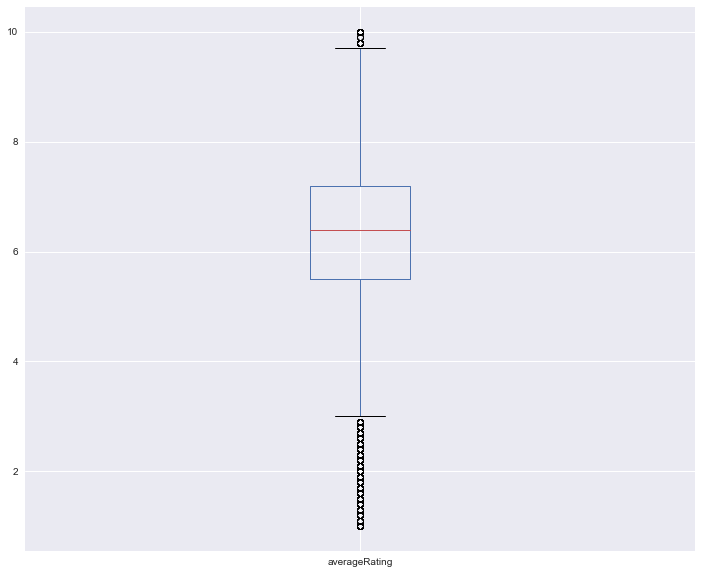

In [32]:
movie_data.averageRating.plot(kind='box')

Calculate the thresholds for the outliers.

In [33]:
q1 = movie_data.averageRating.quantile(0.25)  # first quartile
q3 = movie_data.averageRating.quantile(0.75)  # third quartile
IQR = q3 - q1  # IQR
lower_threshold = q1 - 1.5 * IQR  # lower threshold
upper_threshold = q3 + 1.5 * IQR  # upper threshold
display(lower_threshold, upper_threshold)

2.9499999999999997

9.75

Pivot table that looks at the average movie rating for each year.

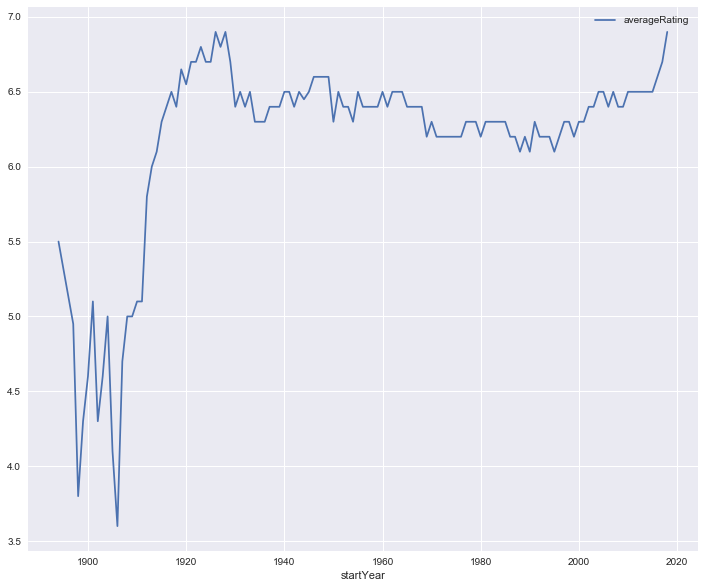

In [34]:
movie_pivot = movie_data.pivot_table(index="startYear", 
                       values=["averageRating"], 
                       aggfunc=pd.np.median)

movie_pivot.plot(kind='line')

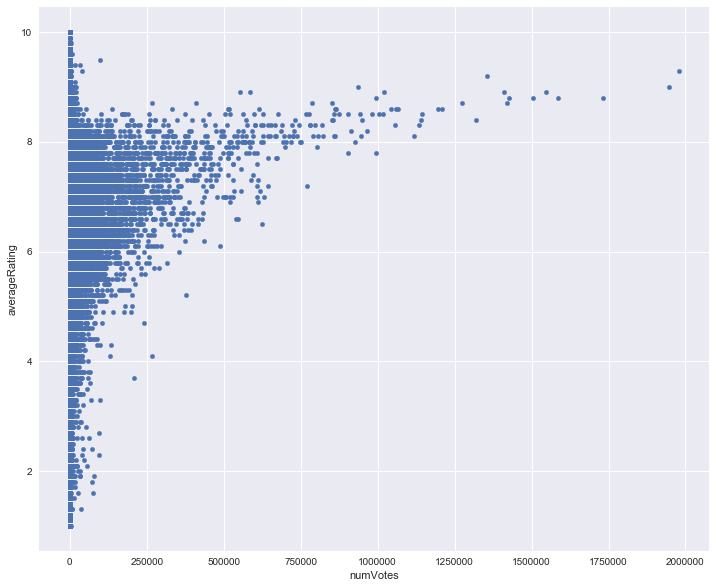

In [35]:
movie_data.plot.scatter(x="numVotes", y="averageRating")

It appears the general trend is that average movie ratings increases each year sometime after the year 2000. Should explore reasons why. Could be movie saturation?

This dataset also shows at first glance that the more votes a movie receives, the better the average rating. Similar concept to if the movie is bad, you may see primarily negative reviews.

**Decision:** Analyze movies that occur on or after the year 1980.

In [36]:
current_movie_data = movie_data[movie_data.startYear >= 1980]

In [37]:
current_movie_data.head()

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
3427,tt0015724,Dama de noche,Dama de noche,1993,102,"Drama,Mystery,Romance",6.2,19
6893,tt0023331,Pesn o geroyakh,Pesn o geroyakh,1983,50,Documentary,6.8,66
15919,tt0035423,Kate & Leopold,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance",6.4,71559
16865,tt0036606,"Another Time, Another Place","Another Time, Another Place",1983,118,Drama,6.6,209
33751,tt0057461,La rosa de los vientos,La rosa de los vientos,1983,84,NaN,4.1,10


There's a fractionally larger threshold after narrowing down the startYear.

In [38]:
q1 = current_movie_data.averageRating.quantile(0.25)  # first quartile
q3 = current_movie_data.averageRating.quantile(0.75)  # third quartile
IQR = q3 - q1  # IQR
lower_threshold = q1 - 1.5 * IQR  # lower threshold
upper_threshold = q3 + 1.5 * IQR  # upper threshold
display(lower_threshold, upper_threshold)

2.7000000000000006

9.9

<hr>

### Determine What Genres to Include

Currently all genres for a movie title are comma separated into one column. Next will [Tidy the Data](https://www.jstatsoft.org/article/view/v059i10) by separating each genre into it's own column with a boolean value.

In [39]:
# Used for Proof of Concept
#current_movie_data.to_csv("current_movie_data.csv", sep='\t', index=False)

In [40]:
movies_genres_list = current_movie_data['genres'].tolist()

# convert all values to a string and return the map as a list
# source: https://stackoverflow.com/a/1303354
movies_genres_list = list(map(str, movies_genres_list))

#movies_genres_list

In [41]:
def get_genres(comma_list):
    '''Returns a sorted list of genres from the dataset'''
    genre_dict = dict()  # { key='genre': val='count' }
    genre_list = list()
    
    for index, val in enumerate(comma_list):
        # create a list of lists for each movie entry
        split_list = comma_list[index].split(',')
        
        # store each genre as one entry in the dictionary
        for index, val in enumerate(split_list):
            genre_dict[val] = genre_dict.get(val, 0) + 1
    
    return convert_dict_to_string(genre_dict)


def convert_dict_to_string(dictionary):
    '''Sorts a dictionary into a list of sorted keys'''
    sortedList = list()
    
    # Create a list of keys
    for key, val in dictionary.items():
        sortedList.append(key)
    
    sortedList.sort()
    
    return sortedList


genres_list = get_genres(movies_genres_list)

In [42]:
# create a new subset of data for when we explode the genre columns
movie_data_expanded = current_movie_data.copy()

# convert the NaN values to a string so they are not a float value & throw an error
movie_data_expanded['genres'] = movie_data_expanded.genres.fillna('')

In [44]:
def find_Value(value, subString):
    if subString in value:
        return True
    else:
        return False

def split_genre_columns(list_of_genres):
    '''Explodes the genres column where there is one new column for each genre in the dataset.
       Each new column has a True/False value that corresponds to the genres column.'''
    print('Number of genres:', len(list_of_genres))
    for index, val in enumerate(list_of_genres):
        print(list_of_genres[index])
        movie_data_expanded[list_of_genres[index]] = movie_data_expanded.apply(lambda x: find_Value(x['genres'], list_of_genres[index]), axis=1)
        
        # convert the column to datatype of string
        movie_data_expanded[list_of_genres[index]] = movie_data_expanded[list_of_genres[index]].astype(str)
        movie_data_expanded[list_of_genres[index]].str.strip()
        
split_genre_columns(genres_list)  #explode the genre columns
movie_data_expanded.head()

Number of genres: 28
Action
Adult
Adventure
Animation
Biography
Comedy
Crime
Documentary
Drama
Family
Fantasy
Game-Show
History
Horror
Music
Musical
Mystery
News
Reality-TV
Romance
Sci-Fi
Short
Sport
Talk-Show
Thriller
War
Western
nan


,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,Action,Adult,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,nan
3427,tt0015724,Dama de noche,Dama de noche,1993,102,"Drama,Mystery,Romance",6.2,19,False,False,...,False,True,False,False,False,False,False,False,False,False
6893,tt0023331,Pesn o geroyakh,Pesn o geroyakh,1983,50,Documentary,6.8,66,False,False,...,False,False,False,False,False,False,False,False,False,False
15919,tt0035423,Kate & Leopold,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance",6.4,71559,False,False,...,False,True,False,False,False,False,False,False,False,False
16865,tt0036606,"Another Time, Another Place","Another Time, Another Place",1983,118,Drama,6.6,209,False,False,...,False,False,False,False,False,False,False,False,False,False
33751,tt0057461,La rosa de los vientos,La rosa de los vientos,1983,84,,4.1,10,False,False,...,False,False,False,False,False,False,False,False,False,False


In [45]:
movie_data_expanded.nan.unique()

array(['False'], dtype=object)

**Decision Needed:** Could keep or remove the `nan` column from the resulting genre list. If kept, it would need to be updated to be `True` for everywhere there is a `''` value in the `genres` column.

In [46]:
# source: https://stackoverflow.com/a/19226617
movie_data_expanded.loc[movie_data_expanded.genres == '', 'nan'] = 'True'

In [47]:
# double check the same number of null values exist as before
movie_data_expanded[movie_data_expanded.genres == ''].genres.value_counts()

    8296
Name: genres, dtype: int64

In [48]:
movie_data_expanded.nan.value_counts()

False    145109
True       8296
Name: nan, dtype: int64

In [49]:
movie_data_expanded[movie_data_expanded.nan == 'True'].head()

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,Action,Adult,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,nan
33751,tt0057461,La rosa de los vientos,La rosa de los vientos,1983,84,,4.1,10,False,False,...,False,False,False,False,False,False,False,False,False,True
48428,tt0074994,Tempyo no iraka,Tempyo no iraka,1980,120,,6.2,8,False,False,...,False,False,False,False,False,False,False,False,False,True
49502,tt0076322,Llocsi caimanta,Llocsi caimanta,1981,100,,6.6,7,False,False,...,False,False,False,False,False,False,False,False,False,True
50168,tt0077133,Ai yu kuang chao,Ai yu kuang chao,1982,92,,5.2,5,False,False,...,False,False,False,False,False,False,False,False,False,True
50362,tt0077367,Consultorio sexológico,Consultorio sexológico,1980,0,,5.6,7,False,False,...,False,False,False,False,False,False,False,False,False,True


#### Determine Stats For Each Genre

In [50]:
#genres_series = pd.Series(genres_list, name='genres')

genre_avg = pd.DataFrame(columns = ['genre', 'averageRating', 'max', 'min', 'count', 'stdDev', 'numVotes', 'avgRuntimeMinutes'])

In [51]:
def calc_genre_avgs(list_genres):
    '''Populate an empty dataframe with calculated values for all genres in the dataset'''
    for index, val in enumerate(list_genres):
        # mask all data for the current genre
        genreData_temp = movie_data_expanded[movie_data_expanded[list_genres[index]] == 'True']
        
        genre_avg.loc[index] = [list_genres[index], genreData_temp.averageRating.mean(), genreData_temp.averageRating.max(), 
                                genreData_temp.averageRating.min(), genreData_temp.averageRating.count(),
                                genreData_temp.averageRating.std(ddof=1), genreData_temp.numVotes.mean(),
                                genreData_temp.runtimeMinutes.mean()]

calc_genre_avgs(genres_list)
genre_avg

,genre,averageRating,max,min,count,stdDev,numVotes,avgRuntimeMinutes
0,Action,5.706637,9.8,1.0,16634,1.425680,11817.326079,88.781472
1,Adult,5.272727,6.7,3.3,11,1.212511,22.636364,70.181818
2,Adventure,6.057409,9.9,1.0,7417,1.443020,23321.861130,89.536875
3,Animation,6.396501,9.3,1.1,3144,1.203997,11761.829198,76.804707
4,Biography,7.140404,10.0,1.1,5294,1.061200,7306.859652,90.251983
5,Comedy,5.971190,10.0,1.0,37838,1.345537,5036.034066,85.512924
6,Crime,6.049103,9.8,1.1,11376,1.277731,10644.274701,92.711937
7,Documentary,7.336309,10.0,1.0,27351,1.086789,284.066140,75.915360
8,Drama,6.356927,10.0,1.0,65101,1.228400,4680.674321,90.661434
9,Family,6.273586,10.0,1.0,6239,1.360970,5039.688732,84.995672


Could also consider using the [`groupby()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) function.

In [52]:
movie_data_expanded.groupby(['Action'])['averageRating'].mean()

Action
False    6.329340
True     5.706637
Name: averageRating, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026F9AF1F518>,
      dtype=object)

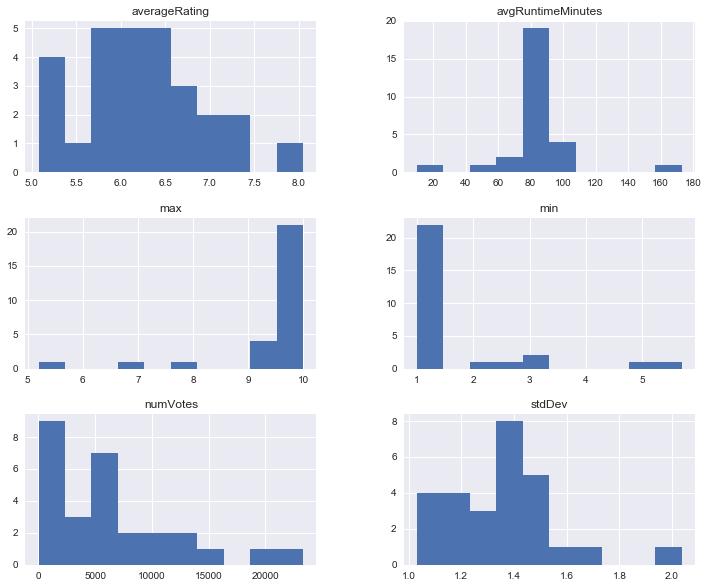

In [53]:
genre_avg.hist()

In [ ]:
#columns = [genres_series, 'averageRating', 'numVotes', 'runtimeMinutes']

#genre_avg = pd.DataFrame

#movie_data_expanded[movie_data_expanded.Action == 'True'].head()

<hr>

### Determine the Target Average Rating

<hr>

## Model the Data

<hr>

## Visualize the Results